<style>
   .input {
       display: none;
   }
   </style>

In [18]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re

<style>
   .input {
       display: none;
   }
   </style>

In [19]:
df=pd.read_csv('~/real_estate/data/_data.csv', index_col=0)
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
pd.set_option('display.float_format', '{:.2f}'.format)
df.head(5)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


# Удаляем из DataFrame все адреса,не относящиеся к Москве

<style>
   .input {
       display: none;
   }
   </style>

In [20]:
df0=df[df['Адрес'].str.contains('Москва', case=False)]
df0.head(5)

,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615


# Преобразуем для построения графиков столбцы в числовые значения

<style>
   .input {
       display: none;
   }
   </style>

In [21]:

df0['price'] = pd.to_numeric(df0['Цена'].str.extract(r'(\d+\.\d+)')[0])
df0['total_area'] = pd.to_numeric(df0['Площадь, м2'].str.extract(r'(\d+\.\d+)')[0])
df0['rooms'] = pd.to_numeric(df0['Количество комнат'].str.extract(r'(\d+)')[0], errors='coerce')
df0['metro'] = pd.to_numeric(df0['Метро'].str.extract(r'\((\d+)')[0], errors='coerce')
df0['Floor'] = df0['Дом'].transform(lambda x: x.split(',')[0].split('/')[0])
df0['All_floor'] = df0['Дом'].transform(lambda x: x.split(',')[0].split('/')[1])
df0['Дом'] = df0['Дом'].transform(lambda x: x.split(',')[1] if len(x.split(',')) > 1 else np.nan)
df0.drop(columns=['Количество комнат'],inplace=True)
df0.drop(columns=['Площадь, м2'],inplace=True)
df0.drop(columns=['Цена'],inplace=True)
df0['Floor'] = pd.to_numeric(df0['Floor'], errors='coerce')
df0['All_floor'] = pd.to_numeric(df0['All_floor'], errors='coerce')
df0['price'].describe()



/tmp/ipykernel_79380/2552749910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['price'] = pd.to_numeric(df0['Цена'].str.extract(r'(\d+\.\d+)')[0])
/tmp/ipykernel_79380/2552749910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['total_area'] = pd.to_numeric(df0['Площадь, м2'].str.extract(r'(\d+\.\d+)')[0])
/tmp/ipykernel_79380/2552749910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

count     19737.00
mean      86563.85
std      128148.32
min        5000.00
25%       39990.00
50%       50000.00
75%       75000.00
max     3000000.00
Name: price, dtype: float64

# Строим графики зависимостей

### 1.График зависимости цены от площади

<style>
   .input {
       display: none;
   }
   </style>

<Axes: xlabel='price', ylabel='total_area'>

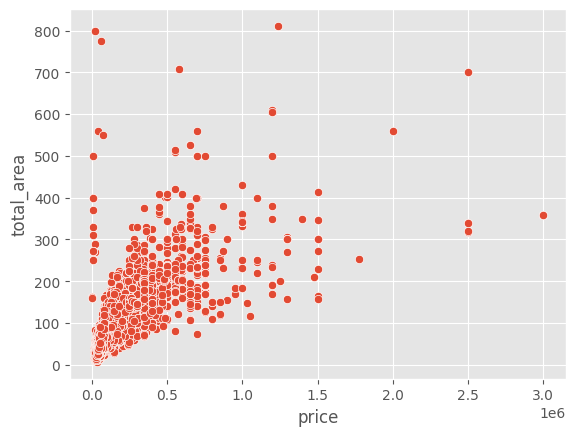

In [6]:
sns.scatterplot(data=df0, x='price', y='total_area')

### 2.Зависимость цены от количества комнат в квартире

<Axes: xlabel='rooms', ylabel='price'>

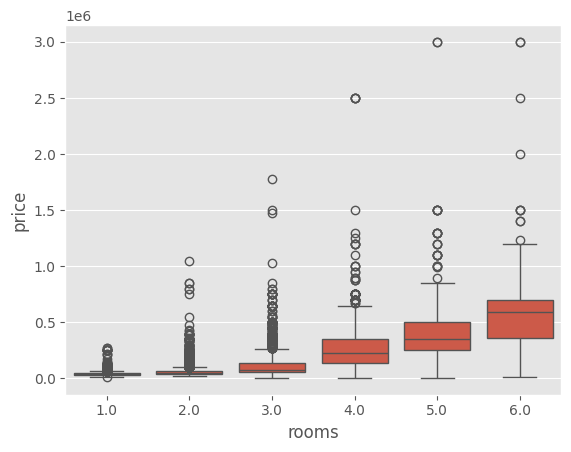

In [7]:
sns.boxplot(data=df0, x='rooms', y='price')

### 3.Зависимость цены от ремонта в квартире

<Axes: xlabel='Ремонт', ylabel='price'>

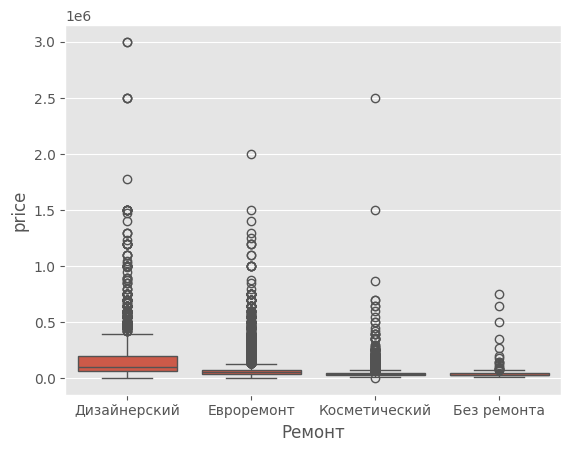

In [8]:
sns.boxplot(data=df0, x='Ремонт', y='price')

### График зависимости цены от расположения окон в квартире

<style>
   .input {
       display: none;
   }
   </style>

<Axes: xlabel='Окна', ylabel='price'>

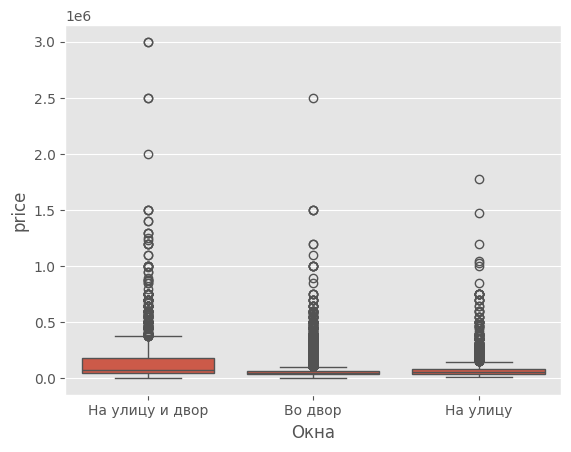

In [9]:
sns.boxplot(data=df0, x='Окна', y='price')

### График зависимости цены от этажа,на котором расположена квартира

<style>
   .input {
       display: none;
   }
   </style>

<Axes: xlabel='Floor', ylabel='price'>

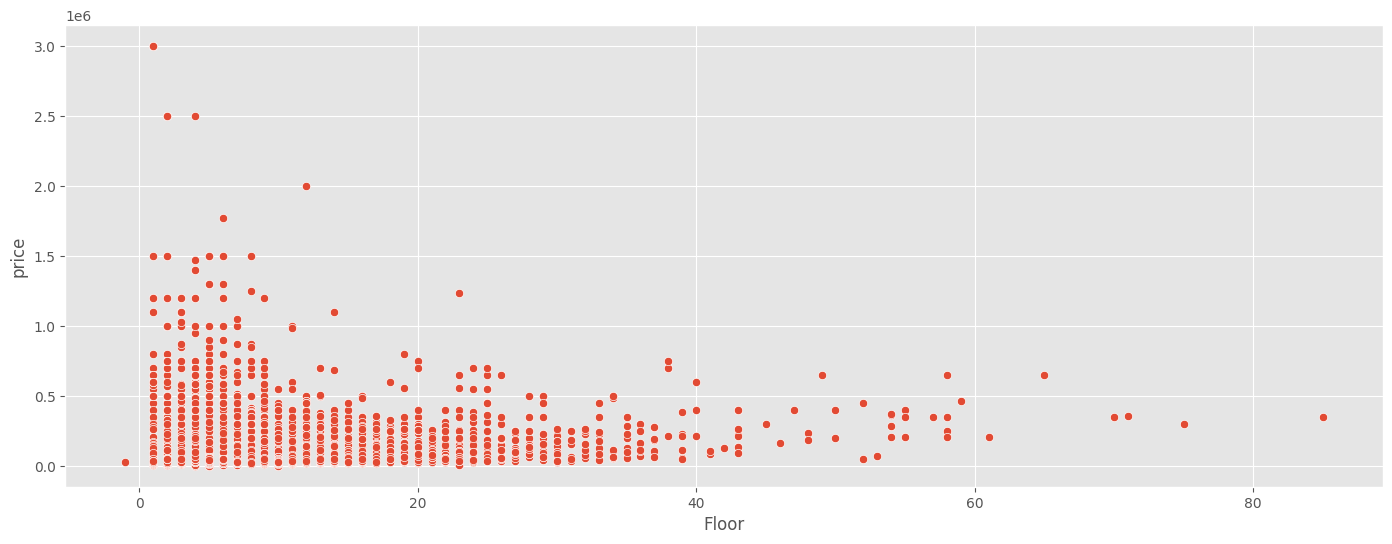

In [10]:
sort_df=df0.sort_values('Floor')
plt.figure(figsize=[17,6])
sns.scatterplot(data=sort_df, x='Floor', y='price')

### График зависимости цены от количества этажей в доме и этажа,на котором расположена квартира

<style>
   .input {
       display: none;
   }
   </style>

<Axes: xlabel='All_floor', ylabel='price'>

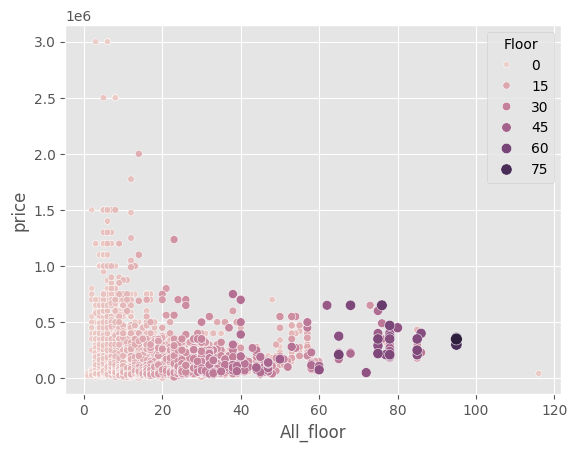

In [11]:
fig, ax = plt.subplots()
sns.scatterplot(data=sort_df, x='All_floor', y='price', size='Floor', hue='Floor', ax=ax)

### График зависимости цены от типажа застройки дома

<style>
   .input {
       display: none;
   }
   </style>

<Axes: xlabel='Дом', ylabel='price'>

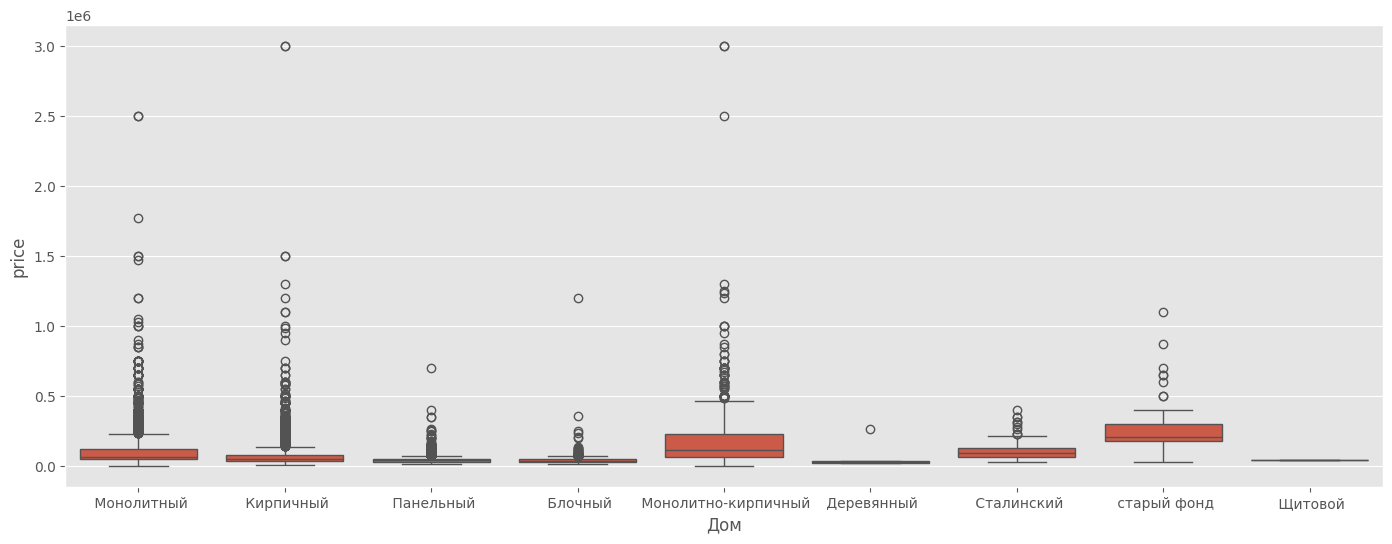

In [12]:
plt.figure(figsize=[17,6])
sns.boxplot(data=sort_df, x='Дом', y='price')

### График,указывающий зависимость цены от расстояния до метро (в минутах ходьбы)

<style>
   .input {
       display: none;
   }
   </style>

<Axes: xlabel='metro', ylabel='price'>

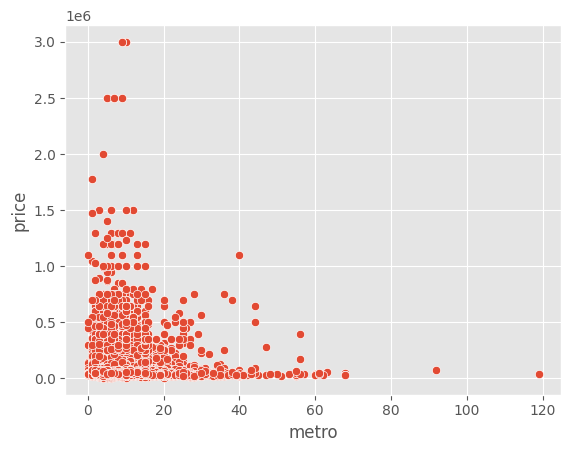

In [13]:
sns.scatterplot(data=df0, x='metro', y='price')

### График,показывающий зависимость цены от от площади и количества комнат (обозначены цветом)

<style>
   .input {
       display: none;
   }
   </style>

(0.0, 1000000.0)

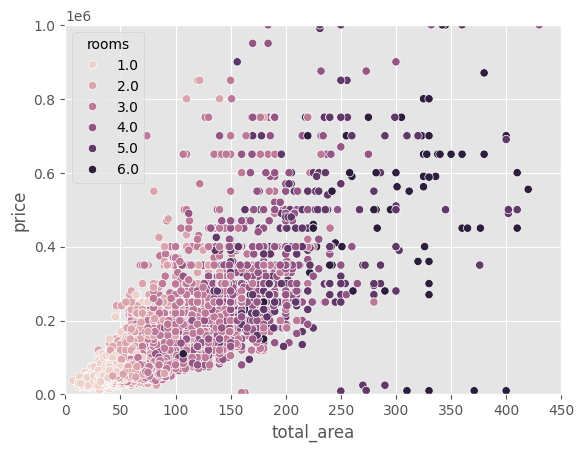

In [14]:
fig, ax = plt.subplots()
sns.scatterplot(data=df0, x='total_area', y='price', hue='rooms', ax=ax)
ax.set_xlim(0, 450)
ax.set_ylim(0, 1000000)

### График показывающий количество квартир по комнатам

<style>
   .input {
       display: none;
   }
   </style>

<Axes: xlabel='rooms', ylabel='count'>

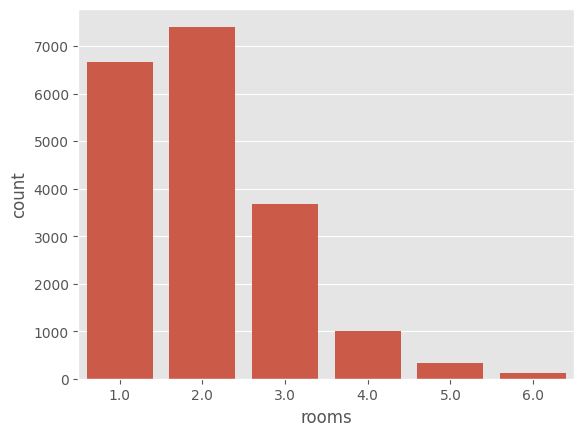

In [15]:
sns.countplot(data=df0, x='rooms')

# Табличные данные

### 1.Статистическое описание цен

<style>
   .input {
       display: none;
   }
   </style>

In [16]:
df0['price'].describe().to_frame()

,price
count,19737.00
mean,86563.85
std,128148.32
min,5000.00
25%,39990.00
50%,50000.00
75%,75000.00
max,3000000.00


### Распределение цены

<style>
   .input {
       display: none;
   }
   </style>

<Axes: xlabel='price', ylabel='Count'>

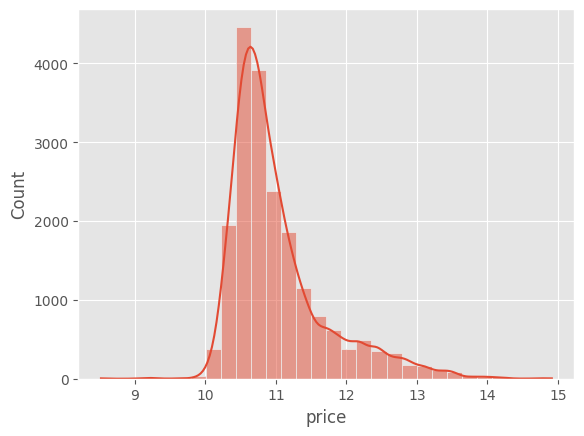

In [17]:
sns.histplot(np.log1p(df0['price']), bins=30, kde=True)

### 2.Пропущенные значения

<style>
   .input {
       display: none;
   }
   </style>

In [18]:
df0.isna().sum().to_frame()

,0
ID объявления,0
Тип,0
Метро,346
Адрес,0
Дом,2971
Парковка,11174
Телефоны,0
Описание,0
Ремонт,2463
"Площадь комнат, м2",7228


### 3.Корреляционная таблица числовых признаков с ценой

<style>
   .input {
       display: none;
   }
   </style>

In [19]:
df0[['price', 'total_area', 'rooms', 'metro', 'Высота потолков, м', 'Floor', 'All_floor']].corr(method='spearman').iloc[1:, 0].to_frame()

,price
total_area,0.77
rooms,0.71
metro,-0.16
"Высота потолков, м",0.53
Floor,0.13
All_floor,0.15
